Task #1
1.   Which are the factors that cause to churn employee?
2.   How can machine learning helpfull for predicting that employee will churn or not?

Task #2

In [488]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [489]:
# import dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [490]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Processing

In [491]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [492]:
# check duplicates values
df.duplicated().sum()

0

In [493]:
# replace same values in one
df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)

In [494]:
# dropping extra column
df.drop(['customerID'],axis=1, inplace=True)

##Data Analysis

In [495]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [496]:
def calculate_churn_ratio(df, column_names, churn_col='Churn'):

    results = {}

    for col in column_names:
        # calculate counts
        grouped_counts = df.groupby([col, churn_col]).size()

        # calculate total counts per group
        total_counts = df.groupby(col).size()

        # churn ratio for the current column
        churn_ratio = grouped_counts.div(total_counts, level=col)

        # Store churn ratio in the results dictionary
        results[col] = churn_ratio

        # Print the current column name
        print(f"Churn ratio for column '{col}':")
        print(churn_ratio)
        print()

    return results


# List of columns to calculate churn ratio for
columns_of_interest = df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

# Calculate churn ratio for the specified columns
churn_ratio_results = calculate_churn_ratio(df, columns_of_interest)


Churn ratio for column 'gender':
gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
dtype: float64

Churn ratio for column 'Partner':
Partner  Churn
No       No       0.670420
         Yes      0.329580
Yes      No       0.803351
         Yes      0.196649
dtype: float64

Churn ratio for column 'Dependents':
Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
dtype: float64

Churn ratio for column 'PhoneService':
PhoneService  Churn
No            No       0.750733
              Yes      0.249267
Yes           No       0.732904
              Yes      0.267096
dtype: float64

Churn ratio for column 'MultipleLines':
MultipleLines  Churn
No             No       0.749754
               Yes      0.250246
Yes            No       0.713901
               Yes      0.286099
dtype: float64

Churn ratio for column 'InternetService':
InternetService

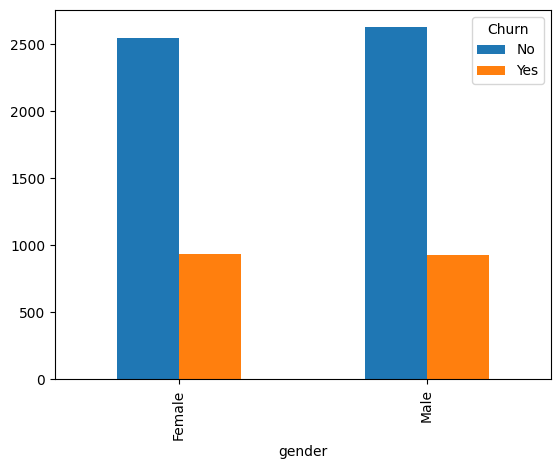

In [497]:
# plot of Churn by gender
pd.crosstab(df.gender,df.Churn).plot(kind="bar")
plt.show()

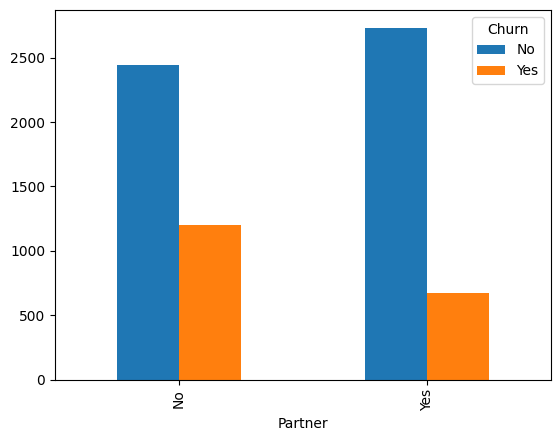

In [498]:
# plot of Churn by partner
pd.crosstab(df.Partner,df.Churn).plot(kind="bar")
plt.show()

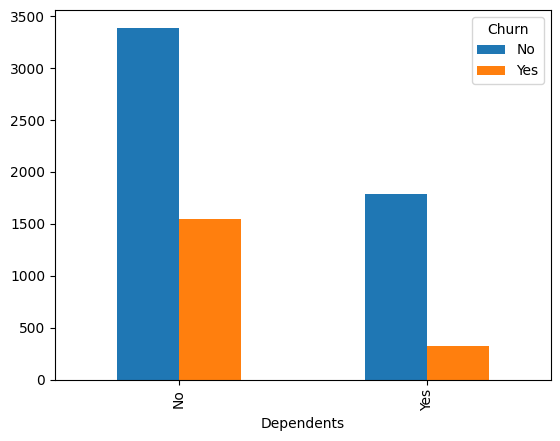

In [499]:
# plot of Churn by dependents
pd.crosstab(df.Dependents,df.Churn).plot(kind="bar")
plt.show()

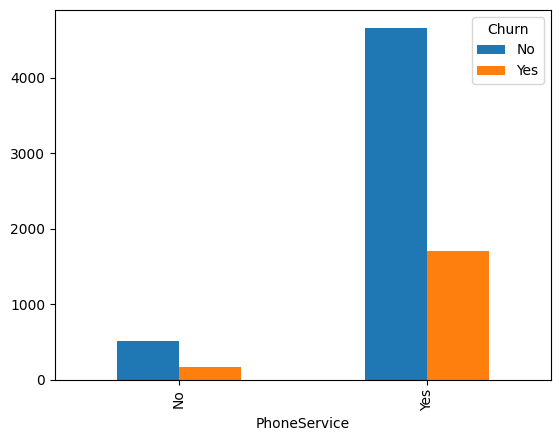

In [500]:
# plot of Churn by phoneservices
pd.crosstab(df.PhoneService,df.Churn).plot(kind="bar")
plt.show()

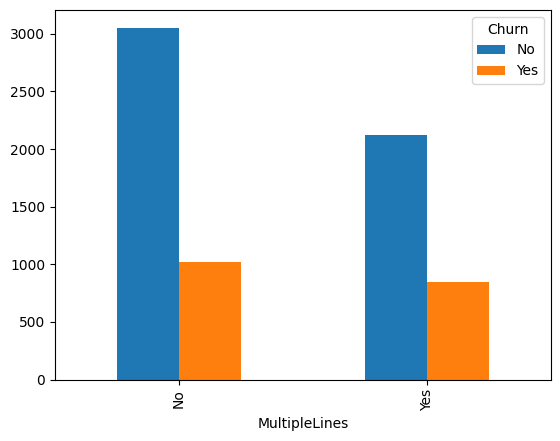

In [501]:
# plot of Churn multiple lines
pd.crosstab(df.MultipleLines,df.Churn).plot(kind="bar")
plt.show()

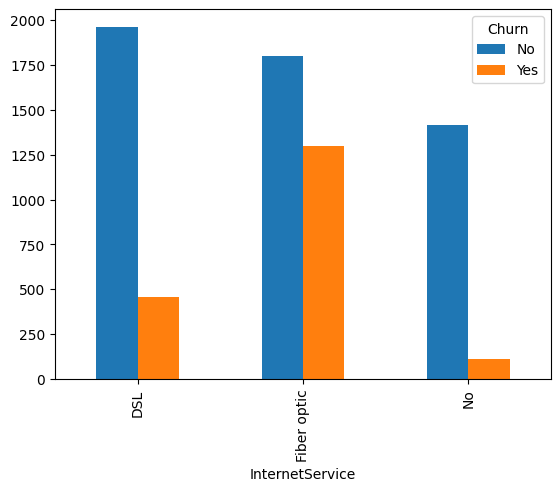

In [502]:
# plot of Churn by internet services
pd.crosstab(df.InternetService,df.Churn).plot(kind="bar")
plt.show()

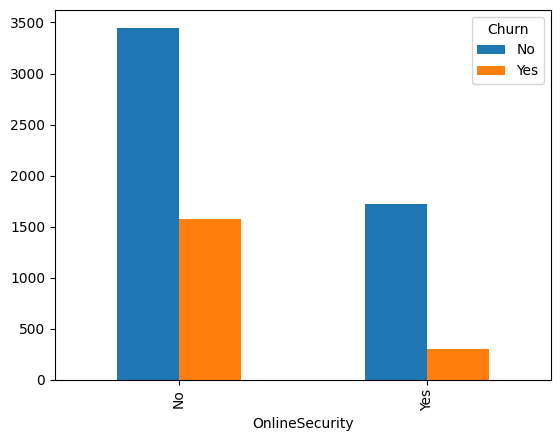

In [503]:
# plot of Churn by online security
pd.crosstab(df.OnlineSecurity,df.Churn).plot(kind="bar")
plt.show()

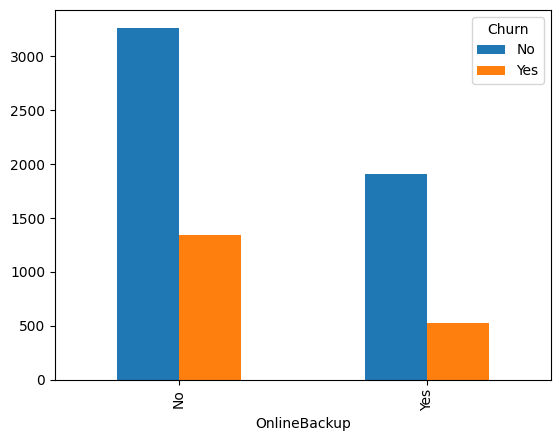

In [504]:
# plot of Churn by online backup
pd.crosstab(df.OnlineBackup,df.Churn).plot(kind="bar")
plt.show()

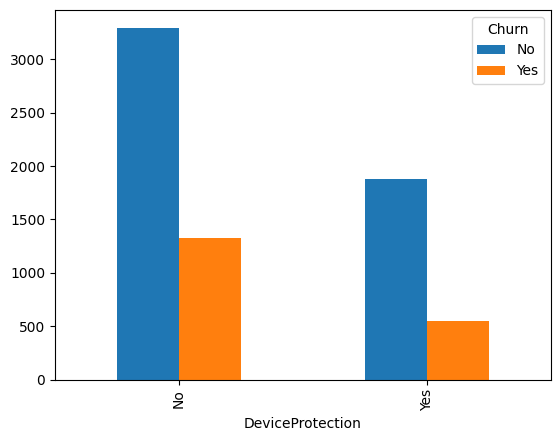

In [505]:
# plot of Churn by device protection
pd.crosstab(df.DeviceProtection,df.Churn).plot(kind="bar")
plt.show()

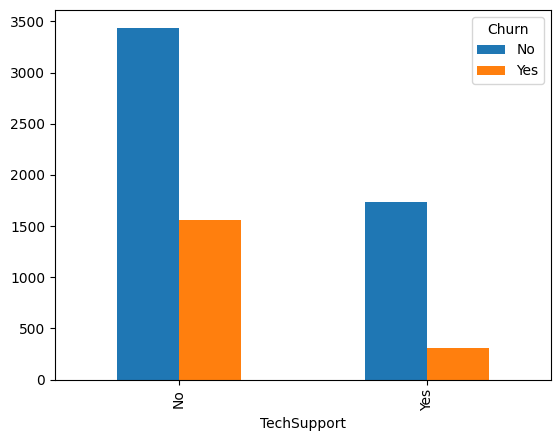

In [506]:
# plot of Churn by tech support
pd.crosstab(df.TechSupport,df.Churn).plot(kind="bar")
plt.show()

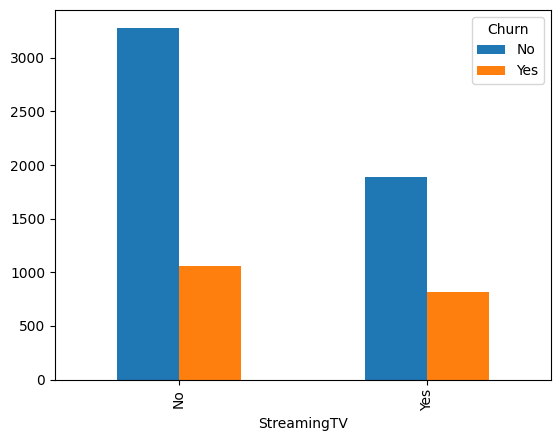

In [507]:
# plot of Churn by streaming tv
pd.crosstab(df.StreamingTV,df.Churn).plot(kind="bar")
plt.show()

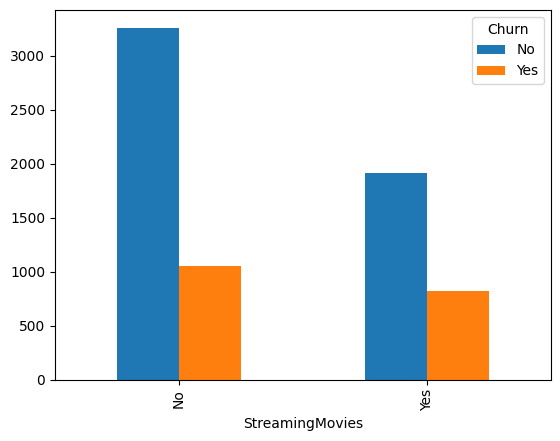

In [508]:
# plot of Churn by streaming movies
pd.crosstab(df.StreamingMovies,df.Churn).plot(kind="bar")
plt.show()

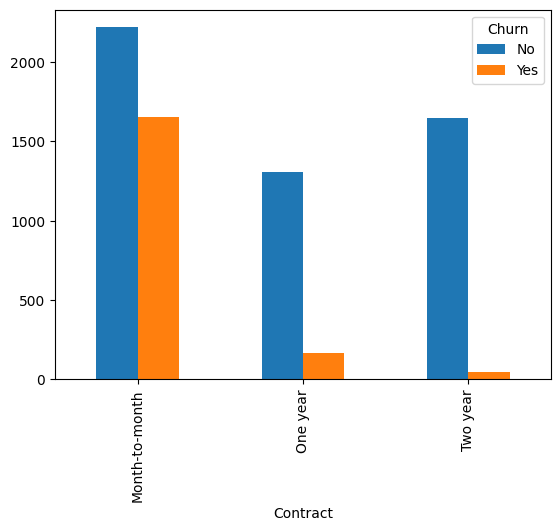

In [509]:
# plot of Churn by contract
pd.crosstab(df.Contract,df.Churn).plot(kind="bar")
plt.show()

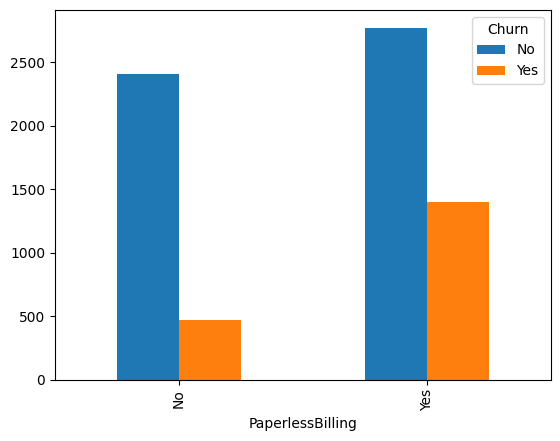

In [510]:
# plot of Churn by paper les billing
pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind="bar")
plt.show()

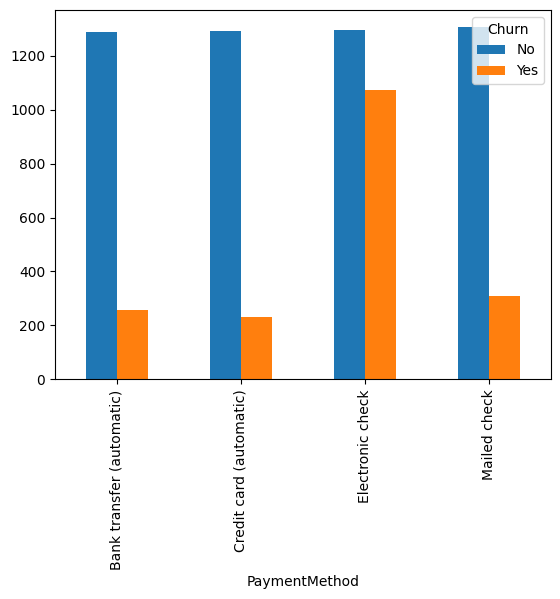

In [511]:
# plot of Churn by Payment method
pd.crosstab(df.PaymentMethod,df.Churn).plot(kind="bar")
plt.show()

In [512]:
# OneHot ecnoding on gender column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[["gender"]])

OneHotEncoder()

In [513]:
res = encoder.transform(df[["gender"]]).toarray()
df[["female", "male"]] = res
df.drop("gender", axis=1, inplace=True)

In [514]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
ordinal_columns = df.select_dtypes("O").drop("Churn", axis=1).columns
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [515]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,female,male
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,2,29.85,2505,No,1.0,0.0
1,0,0,0,34,1,0,0,1,0,1,...,0,0,1,0,3,56.95,1466,No,0.0,1.0
2,0,0,0,2,1,0,0,1,1,0,...,0,0,0,1,3,53.85,157,Yes,0.0,1.0
3,0,0,0,45,0,0,0,1,0,1,...,0,0,1,0,0,42.30,1400,No,0.0,1.0
4,0,0,0,2,1,0,1,0,0,0,...,0,0,0,1,2,70.70,925,Yes,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,0,1,...,1,1,1,1,3,84.80,1597,No,0.0,1.0
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,1,1,1,103.20,5698,No,1.0,0.0
7040,0,1,1,11,0,0,0,1,0,0,...,0,0,0,1,2,29.60,2994,No,1.0,0.0
7041,1,1,0,4,1,1,1,0,0,0,...,0,0,0,1,3,74.40,2660,Yes,0.0,1.0


In [516]:
# statistics details of dataset
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,female,male
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,3257.794122,0.495244,0.504756
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,1888.693496,0.500013,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000,1.000000


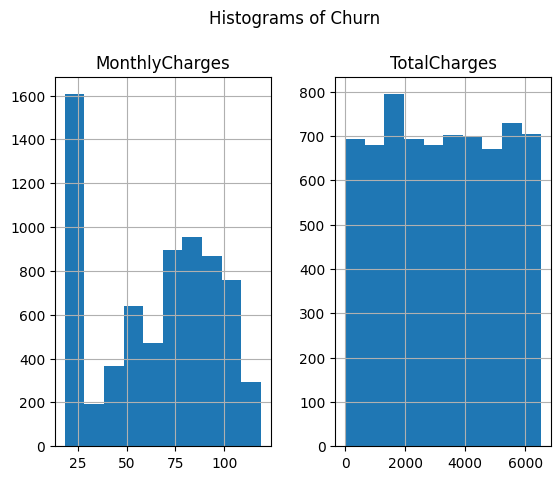

In [517]:
# Plot of Churn
df[["MonthlyCharges","TotalCharges"]].hist()
plt.suptitle("Histograms of Churn", y=1.02)
plt.show()

In [518]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
scaler.fit(df[['tenure','MonthlyCharges','TotalCharges']])
df[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [519]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [520]:
# Data balancing
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_new, y_new = sampler.fit_resample(X,y)

###Modeling

In [521]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.2)

In [522]:
# Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [523]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [524]:
# Storing functions of models in variable
models = [
    RandomForestClassifier(),
    SVC(),
]

In [525]:
for mdl in models:
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred, average="macro")

    # Recall
    recall = recall_score(y_test, y_pred, average="macro")

    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average="macro")

    # Report
    report = classification_report(y_test, y_pred)

    name = type(mdl).__name__
    print(name)
    print("Training Score : ", mdl.score(X_train, y_train))
    print("Testing  Score : ", mdl.score(X_test, y_test))
    print('Accuracy : ', accuracy)
    print('F1 : ', f1_sco)
    print('Reacll : ', recall)
    print('Precision : ', precision)
    print('Classification Report....\n', report)
    print("++++++++++++++++++++++++++++++++++++++++++++++++")

RandomForestClassifier
Training Score :  0.9984295723604736
Testing  Score :  0.8371980676328502
Accuracy :  0.8371980676328502
F1 :  0.8370991843400006
Reacll :  0.8370307645195985
Precision :  0.8374967862568657
Classification Report....
               precision    recall  f1-score   support

          No       0.85      0.82      0.83      1024
         Yes       0.83      0.85      0.84      1046

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

++++++++++++++++++++++++++++++++++++++++++++++++
SVC
Training Score :  0.8102198598695337
Testing  Score :  0.7932367149758454
Accuracy :  0.7932367149758454
F1 :  0.7922029916614755
Reacll :  0.7925766312141491
Precision :  0.7976068376068376
Classification Report....
               precision    recall  f1-score   support

          No       0.83      0.73      0.78      1024
         Yes       0.76      0.85      0.81      104